In [46]:
#创建数据库

NameError: name &#39;创建数据库&#39; is not defined

In [2]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.widgets import *
from fastbook import *
key = os.environ.get('AZURE_SEARCH_KEY', 'f725cff303864bbe9178ee4f7a689d5a')

search_images_bing

results = search_images_bing(key,'Pikachu')
ims = results.attrgot('content_url')
len(ims)


150

In [9]:
dest = 'C:/Users/56914/Desktop/python_tur/images/Pikachu.jpg'
download_url(ims[0],dest)             #从网上下载图片到目录中

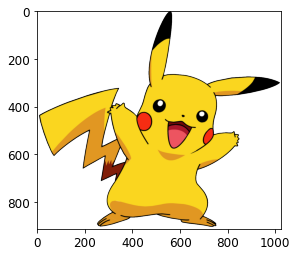

In [10]:

im = Image.open(dest)
im.to_thumb(128.128)
plt.imshow(im)

In [11]:
pokemon_types = 'Pikachu','Squirtle'
path = Path('C:/Users/56914/Desktop/python_tur/pokemon')

In [12]:
if not path.exists():
    path.mkdir()               #创建目录
    for o in pokemon_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} pokemon')  #搜索 Pikachu pokemon
        download_images(dest, urls=results.attrgot('content_url'))

In [13]:
fns = get_image_files(path)
fns

(#290) [Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000000.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000001.png'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000002.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000003.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000004.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000005.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000006.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000007.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000008.jpg'),Path('C:/Users/56914/Desktop/python_tur/pokemon/Pikachu/00000009.jpg')...]

In [14]:
failed = verify_images(fns) #Find images in fns that can't be opened


In [15]:
failed

NameError: name 'failed' is not defined

In [13]:
failed.map(Path.unlink)

(#0) []

In [45]:
#训练初始化

SyntaxError: invalid syntax (&lt;ipython-input-45-6757e5543ba5&gt;, line 1)

In [16]:
pokemon = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(valid_pct = 0.3,seed=42),
    get_y = parent_label,
    item_tfms=Resize(128)
    
)

In [17]:
dls = pokemon.dataloaders(path)

In [18]:
pokemon = pokemon.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = pokemon.dataloaders(path,num_workers=0)

In [ ]:
#训练模型

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.514006,0.167700,0.057471,00:13
1,0.385239,0.121259,0.080460,00:15
2,0.296006,0.121803,0.057471,00:12
3,0.248185,0.101880,0.057471,00:13


&lt;IPython.core.display.HTML object&gt;

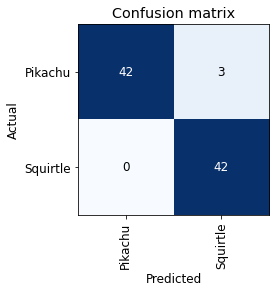

In [60]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

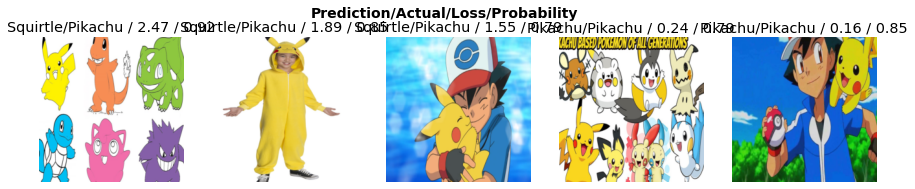

In [61]:
interp.plot_top_losses(5, nrows=1)

In [62]:
#导出模型

In [24]:
learn.export('pikachu_train.pkl')

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [3]:
path = Path()
learn_inf = load_learner(path/'export.pkl')

In [4]:
learn_inf.predict('C:/Users/56914/Desktop/python_tur/images/Pikachu.jpg')

In [5]:

learn_inf.dls.vocab

(#2) ['Pikachu','Squirtle']

In [23]:
#图形界面

In [6]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')